In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data
df = pd.read_csv(r"C:\Users\GILL\Airbnb_Market_Profitability\airbnb_data.csv.csv")
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


df['price'] = (
    df['price']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.replace('₹', '', regex=False)
    .str.strip()
)
df['price'] = pd.to_numeric(df['price'], errors='coerce')


num_cols = ['price', 'host_total_listings_count', 'total_reviewers_number']
for col in num_cols:
    df[col] = (df[col]
               .astype(str)
               .str.replace(',', '', regex=False)
               .str.strip())
    df[col] = pd.to_numeric(df[col], errors='coerce')





C:\Users\GILL\AppData\Local\Temp\ipykernel_31576\2215353589.py:6: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\GILL\Airbnb_Market_Profitability\airbnb_data.csv.csv")


                                                      Pricing distribution

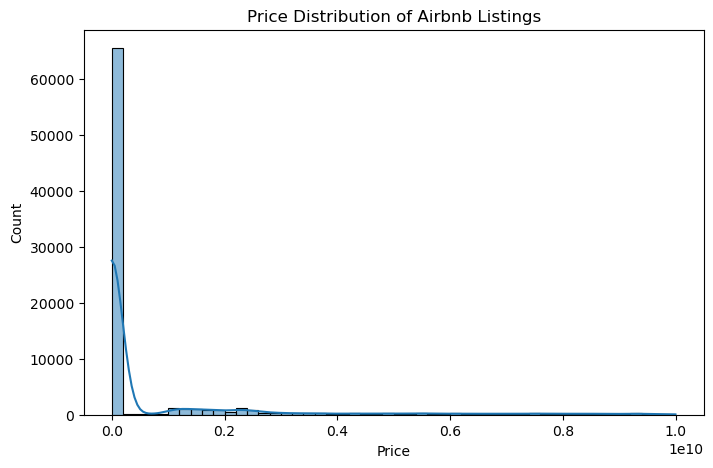

In [10]:

plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution of Airbnb Listings")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


                                                    Average pricing by the city       

C:\Users\GILL\AppData\Local\Temp\ipykernel_31576\3375822443.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_price.values, y=city_price.index, palette='viridis')


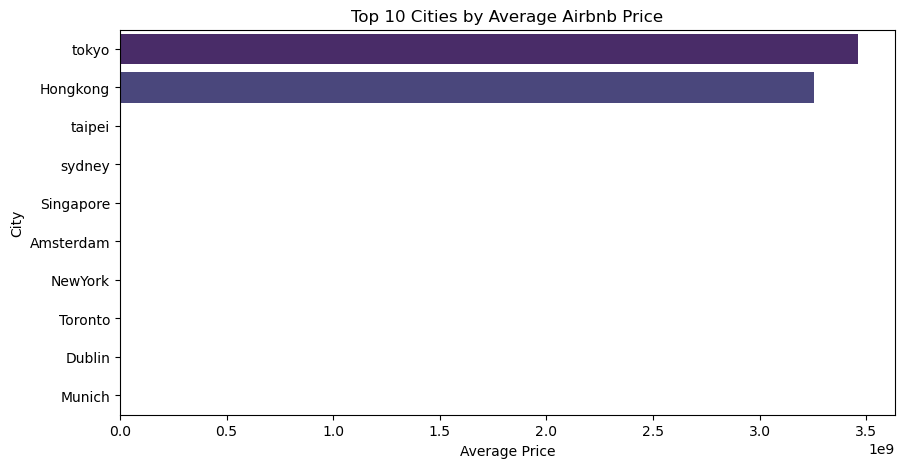

In [11]:
city_price = df.groupby('city')['price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=city_price.values, y=city_price.index, palette='viridis')
plt.title("Top 10 Cities by Average Airbnb Price")
plt.xlabel("Average Price")
plt.ylabel("City")
plt.show()

                                                   Room type distribution

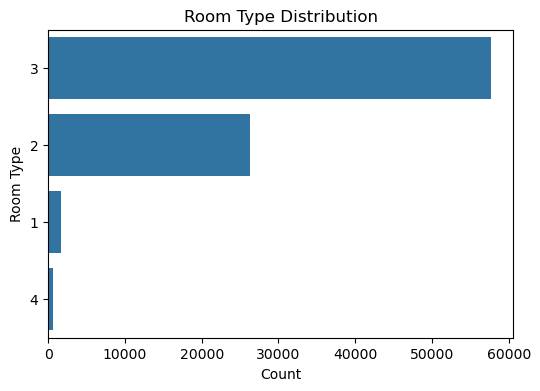

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(y='room_type', data=df, order=df['room_type'].value_counts().index)
plt.title("Room Type Distribution")
plt.xlabel("Count")
plt.ylabel("Room Type")
plt.show()

In [17]:
df['room_type'].value_counts()    

#1 → Entire home/apartment

#2 → Private room

#3 → Shared room

#4 → Hotel room"""

room_type
3    57684
2    26245
1     1658
4      599
Name: count, dtype: int64

                                              Pricing vs reviews


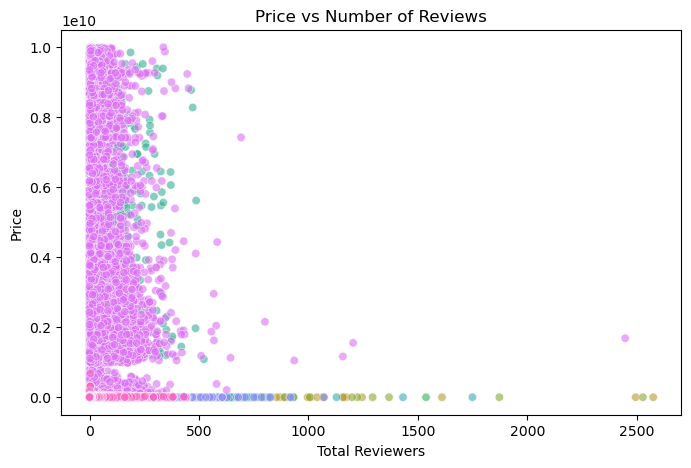

In [20]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='total_reviewers_number', y='price', hue='city', alpha=0.6)
plt.title("Price vs Number of Reviews")
plt.xlabel("Total Reviewers")
plt.ylabel("Price")
plt.legend([],[], frameon=False)
plt.show()